## Regression

#### The goal is to take continuous data, find the equation that best fits the data, and be able forecast out a specific value. With simple linear regression, you are just simply doing this by creating a best fit line. A popular use with regression is to predict stock prices. This is done because we are considering the fluidity of price over time, and attempting to forecast the next fluid price in the future using a continuous dataset.
####     Regression is a form of supervised machine learning, which is where the scientist teaches the machine by showing it features and then showing it what the correct answer is, over and over, to teach the machine. Once the machine is taught, the scientist will usually "test" the machine on some unseen data, where the scientist still knows what the correct answer is, but the machine doesn't. The machine's answers are compared to the known answers, and the machine's accuracy can be measured. If the accuracy is high enough, the scientist may consider actually employing the algorithm in the real world.

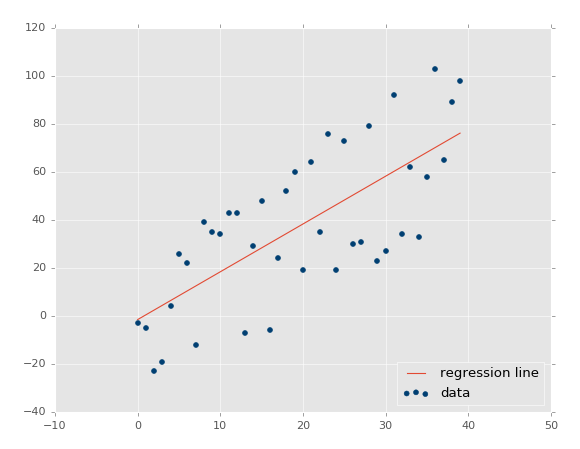

In [28]:
from IPython import display
display.Image("https://pythonprogramming.net/static/images/machine-learning/linear-regression-algorithm-tutorial-test.png")

#### From here, we can use the equation of that line to forecast out into the future, where the 'date' is the x-axis, what the price will be.

In [63]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
from sklearn import datasets

df = quandl.get('WIKI/GOOGL', api_key='ef__EKqy-2c4nAJHVYpG') # ticker to get the google stock from quandl
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


####  We can most likely agree that having both the regular columns and adjusted columns is redundant. Adjusted columns are the most ideal ones. Regular columns here are prices on the day, but stocks have things called stock splits, where suddenly 1 share becomes something like 2 shares, thus the value of a share is halved, but the value of the company has not halved. Adjusted columns are adjusted for stock splits over time, which makes them more reliable for doing analysis.

#### We need meaningful and useful data for machine learning. So how do you know if you have meaningful data? 
####  1. Historical prices -> X 
####  2. Historical Patterns -> X
####  3. relationship between price changes and volume over time, along with historical patterns -> ?
#### Daily Volatility :- High - low %
#### Daily % change :- Open - Closed %



In [52]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_pct'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100
df['PCT_change'] = (df['Adj. Open'] - df['Adj. Close']) / df['Adj. Close'] * 100

In [53]:
df = df[['Adj. Close', 'HL_pct', 'PCT_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_pct,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,-0.323915,44659000.0
2004-08-20,54.322689,8.537313,-6.739913,22834300.0
2004-08-23,54.869377,4.062357,1.243144,18256100.0
2004-08-24,52.597363,7.753210,6.074187,15247300.0
2004-08-25,53.164113,3.966115,-1.169811,9188600.0


## Features and Labels

#### With supervised learning, you have features and labels. The features are the descriptive attributes, and the label is what you're attempting to predict or forecast. In our case, what are the features and what is the label? We're trying to predict the price, so is price the label? If so, what are the featuers? When it comes to forecasting out the price, our label, the thing we're hoping to predict, is actually the future price. As such, our features are actually: current price, high minus low percent, and the percent change volatility. The price that is the label shall be the price at some determined point the future.

#### Here, we define the forecasting column, then we fill any NaN data with -99999. You have a few choice here regarding how to handle missing data. You can't just pass a NaN (Not a Number) datapoint to a machine learning classifier, you have to handle for it. One popular option is to replace missing data with -99,999. With many machine learning classifiers, this will just be recognized and treated as an outlier feature.

In [54]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.05 * len(df)))

#### Finally, we define what we want to forecast out. In our case, we've decided the features are a bunch of the current values, and the label shall be the price, in the future, where the future is 1% of the entire length of the dataset out. We'll assume all current columns are our features, so we'll add a new column with a simple pandas operation:

In [55]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [30]:
# shift function example

# ind = pd.date_range('01 / 01 / 2000', periods = 5)
# df = pd.DataFrame({"A":[1, 2, 3, 4, 5],
#                    "B":[10, 20, 30, 40, 50],
#                    "C":[11, 22, 33, 44, 55],
#                    "D":[12, 24, 51, 36, 2]},
#                     index = ind)
# df.shift(0),df.shift(2),df.shift(-2)




In [85]:
# df

## Training and Testing

In [86]:
# We'll then drop any still NaN information from the dataframe:
#df.dropna(inplace=True)

#### It is a typical standard with machine learning in code to define X (capital x), as the features, and y (lowercase y) as the label that corresponds to the features. As such, we can define our features and labels like so:

#### as our entire dataframe EXCEPT for the label column, converted to a numpy array. We do this using the .drop method that can be applied to dataframes, which returns a new dataframe. Next, we define our y variable, which is our label, as simply the label column of the dataframe, converted to a numpy array.

In [56]:
X = np.array(df.drop(['label'],axis=1))


#### We could leave it at this, and move on to training and testing, but we're going to do some pre-processing. Generally, you want your features in machine learning to be in a range of -1 to 1. This may do nothing, but it usually speeds up processing and can also help with accuracy. Because this range is so popularly used, it is included in the preprocessing module of Scikit-Learn. To utilize this, you can apply preprocessing.scale to your X variable:

In [57]:
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

#### Now comes the training and testing. The way this works is you take, for example, 75% of your data, and use this to train the machine learning classifier. Then you take the remaining 25% of your data, and test the classifier. Since this is your sample data, you should have the features and known labels. Thus, if you test on the last 25% of your data, you can get a sort of accuracy and reliability, often called the confidence score. There are many ways to do this, but, probably the best way is using the build in cross_validation provided, since this also shuffles your data for you.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### The return here is the training set of features, testing set of features, training set of labels, and testing set of labels. Now, we're ready to define our classifier. There are many classifiers in general available through Scikit-Learn, and even a few specifically for regression. We'll show a couple in this example, but for now, let's use Support Vector Regression from Scikit-Learn's svm package

#### And next we define a classifier with Linear Regression. And train the classifier with the train data. Now we calculate the cofidence(accuracy) of the classifier using .score method.
#### Our X_lately variable contains the most recent features, which we're going to predict against.

In [59]:
# clf = svm.SVR() -> 0.7853119484309191
clf = LinearRegression() # -> 0.9769478805588366
# we can specify n_jobs = for execution of no of jobs at a time (-1 for as many as possible, 1 is default)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[1112.44471179 1115.1876098  1119.77118746 1086.95113883 1082.32660806
 1065.97891734 1075.6509149  1059.30107616 1062.20686529 1062.91334496
 1054.59202058 1061.70891639 1061.56480374 1059.61807854 1055.18033326
 1035.47094743 1044.24212103 1054.01195311 1052.86465792 1059.94986152
 1039.59224683 1039.69065864 1033.30619401 1055.97209222 1058.2338906
 1050.56329103 1043.67304653 1041.55009842 1050.73892948 1059.45851398
 1072.51837335 1068.04796975 1055.77183139 1056.9294292  1066.16584357
 1055.85723133 1058.20661921 1062.29653176 1067.08973638 1054.68761038
 1049.31293049 1043.03389323 1051.62124647 1063.89718018 1063.0670309
 1058.68852998 1047.7990201  1052.2307317  1077.37887202 1083.16454522
 1093.08023958 1084.53226632 1091.02662098 1084.50571444 1105.71705643
 1115.24562422 1113.09335423 1107.19911202 1128.54663071 1128.16074278
 1130.61017992 1132.12900715 1134.3729887  1136.00658241 1123.61464206
 1127.530756   1103.36716104 1108.93827308 1112.15028388 1111.29477852
 1157.63

### Next, we're going to add a new column to our dataframe, the forecast column, At first we initialize it with NaN.

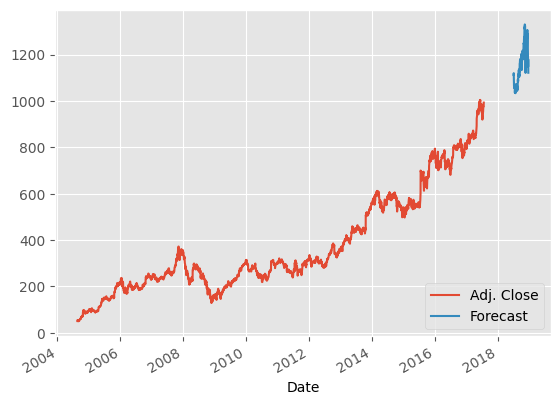

In [62]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import mpld3
mpld3.enable_notebook()

style.use('ggplot')

df['Forecast'] = np.nan
last_date = df.iloc[-1].name
# this gives the last date in the dataframe
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.show()